# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
# Library untuk manipulasi data
import pandas as pd
import numpy as np

# Library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Mengatur agar Pandas menampilkan semua kolom
pd.set_option('display.max_columns', None)

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# Tentukan path ke dataset mentah Anda
# Ganti ini jika nama file atau lokasinya berbeda
raw_data_path = "Telco Customer Churn.csv"

# Muat dataset ke dalam DataFrame pandas
df_raw = pd.read_csv(raw_data_path)

# Tampilkan 5 baris pertama untuk melihat data
print("--- 5 Baris Pertama Data ---")
display(df_raw.head())

# Tampilkan informasi dasar dataset (tipe data, non-null counts)
print("\n--- Info Dataset ---")
df_raw.info()

--- 5 Baris Pertama Data ---


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



--- Info Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  70

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

--- Statistik Deskriptif (Kolom Numerik) ---


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000



Jumlah baris dengan 'TotalCharges' yang bermasalah (kosong): 11
Contoh baris 'TotalCharges' yang bermasalah:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No



--- Distribusi Kolom Target (Churn) ---
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

Dataset ini 'imbalanced', dengan mayoritas pelanggan (73.5%) tidak churn.


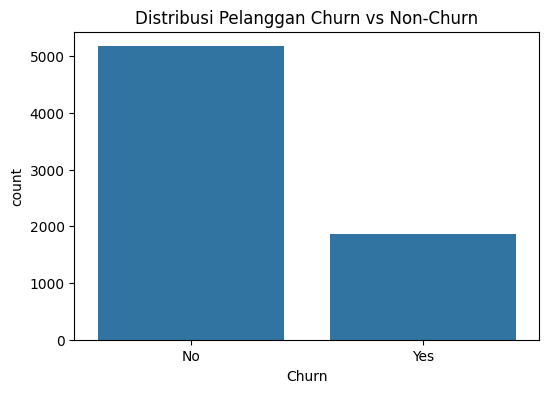

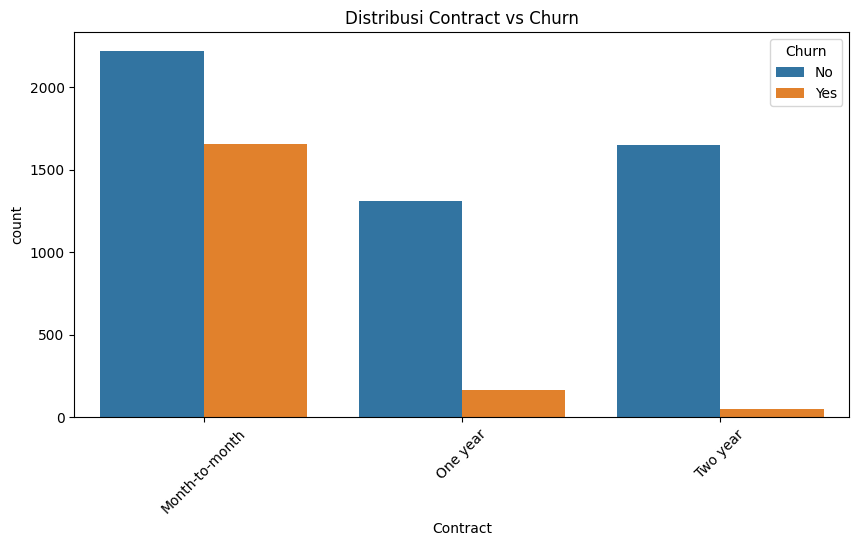

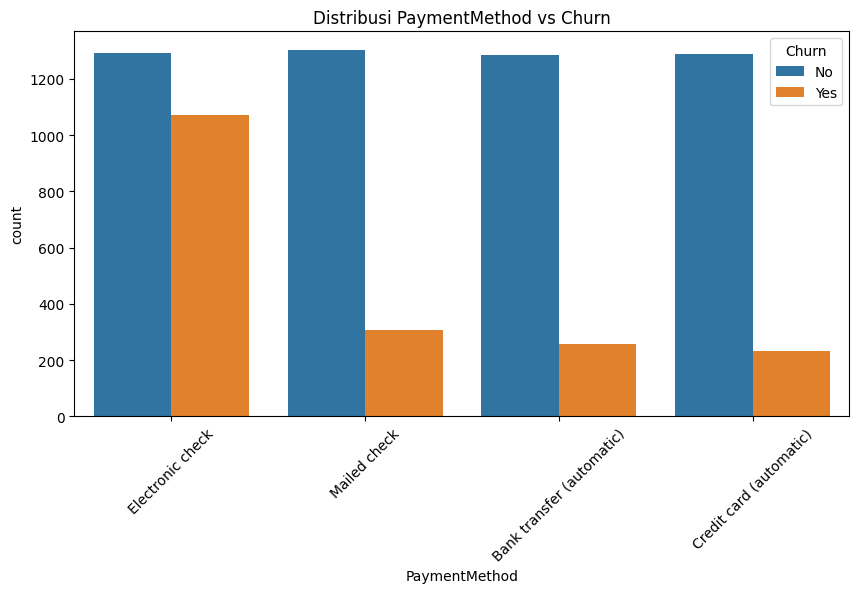

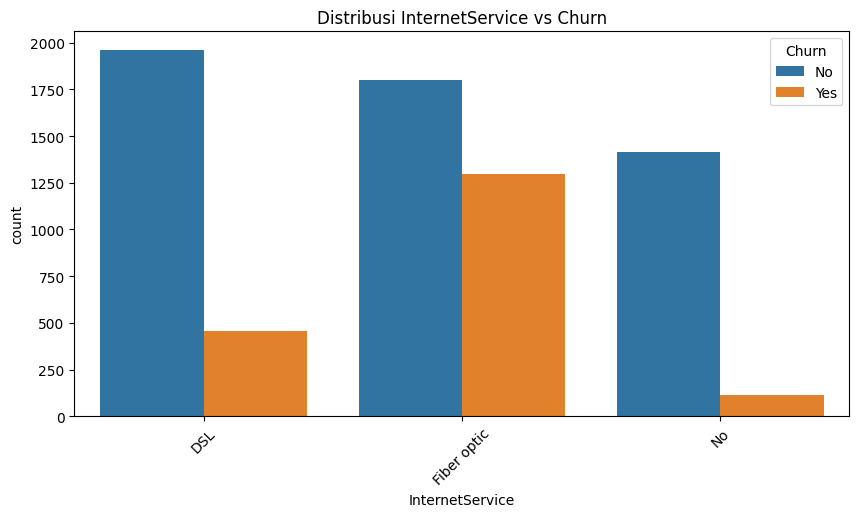

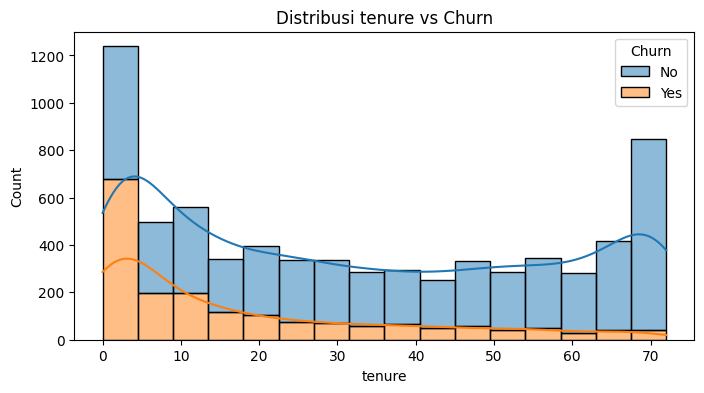

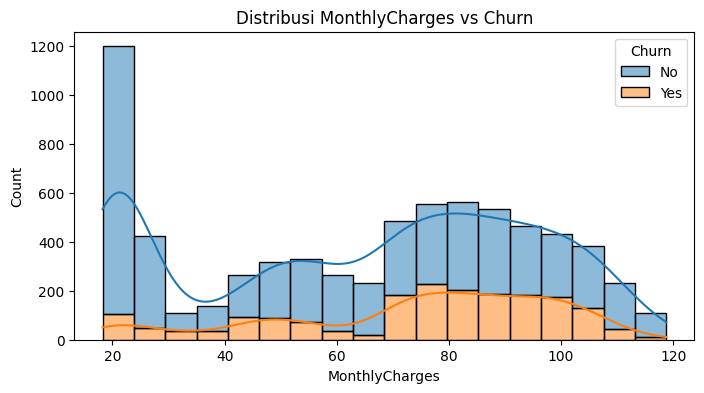

In [3]:
# Kita akan bekerja dengan salinan data agar data mentah tetap utuh
df_eda = df_raw.copy()

# 1. Statistik Deskriptif (hanya untuk kolom numerik)
print("--- Statistik Deskriptif (Kolom Numerik) ---")
display(df_eda.describe())

# 2. Investigasi 'TotalCharges' (tipe object, seharusnya numerik)
# Kita coba konversi ke numerik. 'errors='coerce'' akan mengubah
# nilai yang tidak valid (seperti spasi kosong) menjadi NaN (Missing Value)
total_charges_numeric = pd.to_numeric(df_eda['TotalCharges'], errors='coerce')

# Hitung berapa banyak nilai yang menjadi NaN
missing_total_charges = total_charges_numeric.isnull().sum()
print(f"\nJumlah baris dengan 'TotalCharges' yang bermasalah (kosong): {missing_total_charges}")

# Tampilkan baris yang bermasalah tersebut
# Kita bisa lihat bahwa ini terjadi pada pelanggan dengan tenure = 0
print("Contoh baris 'TotalCharges' yang bermasalah:")
display(df_eda[total_charges_numeric.isnull()])

# 3. Menganalisis Kolom Target ('Churn')
print("\n--- Distribusi Kolom Target (Churn) ---")
churn_percentage = df_eda['Churn'].value_counts(normalize=True) * 100
print(churn_percentage)
print("\nDataset ini 'imbalanced', dengan mayoritas pelanggan (73.5%) tidak churn.")

# Plot visual untuk distribusi Churn
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df_eda)
plt.title('Distribusi Pelanggan Churn vs Non-Churn')
plt.show()

# 4. Menganalisis Fitur Kategorikal
# Kita pilih beberapa fitur kategorikal penting untuk dilihat
categorical_features_to_plot = ['Contract', 'PaymentMethod', 'InternetService']

for feature in categorical_features_to_plot:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df_eda, x=feature, hue='Churn')
    plt.title(f'Distribusi {feature} vs Churn')
    plt.xticks(rotation=45)
    plt.show()

# 5. Menganalisis Fitur Numerik
# Kita lihat distribusi 'tenure', 'MonthlyCharges'
numerical_features_to_plot = ['tenure', 'MonthlyCharges']

for feature in numerical_features_to_plot:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df_eda, x=feature, hue='Churn', kde=True, multiple="stack")
    plt.title(f'Distribusi {feature} vs Churn')
    plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [4]:
# Kita mulai dengan salinan baru dari data mentah
df_prep = df_raw.copy()

# --- 1. Pembersihan Data ---

# a. Menghapus kolom 'customerID' karena tidak relevan
df_prep = df_prep.drop('customerID', axis=1)

# b. Menangani missing values di 'TotalCharges'
# Konversi ke numerik, yang akan menghasilkan NaN
df_prep['TotalCharges'] = pd.to_numeric(df_prep['TotalCharges'], errors='coerce')

# Berdasarkan EDA, ada 11 baris NaN. Ini sangat sedikit (<0.2% data).
# Cara paling sederhana dan aman adalah menghapus baris ini.
df_prep.dropna(inplace=True)

# Cek ulang jumlah data
print(f"Jumlah baris setelah dibersihkan: {len(df_prep)}")
print(f"Jumlah missing values setelah dibersihkan: {df_prep.isnull().sum().sum()}")


# --- 2. Encoding Kolom Target ---
# Ubah 'Churn' dari "Yes"/"No" menjadi 1/0
df_prep['Churn'] = df_prep['Churn'].map({'Yes': 1, 'No': 0})


# --- 3. Pemisahan Fitur dan Target ---
X = df_prep.drop('Churn', axis=1)
y = df_prep['Churn']


# --- 4. Identifikasi Tipe Kolom ---
# Kita perlu memisahkan mana kolom numerik (untuk di-scale)
# dan mana kolom kategorikal (untuk di-encode)

# 'SeniorCitizen' adalah 0/1, tapi ini adalah kategori. Kita masukkan ke kategorikal.
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

categorical_features = [col for col in X.columns if col not in numerical_features]

print(f"\nFitur Numerik ({len(numerical_features)}): {numerical_features}")
print(f"Fitur Kategorikal ({len(categorical_features)}): {categorical_features}")


# --- 5. Membuat Pipeline Preprocessing ---

# Buat transformer untuk fitur numerik: StandardScaler
# Ini akan mengubah skala data agar memiliki rata-rata 0 dan standar deviasi 1
numeric_transformer = StandardScaler()

# Buat transformer untuk fitur kategorikal: OneHotEncoder
# Ini akan mengubah kategori (misal: 'DSL', 'Fiber') menjadi kolom 0/1
# 'handle_unknown='ignore'' penting agar model tidak error jika bertemu kategori baru
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Gabungkan kedua transformer menggunakan ColumnTransformer
# Ini akan menerapkan transformer yang tepat ke kolom yang tepat
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # Biarkan kolom yang tidak disebut (jika ada)
)


# --- 6. Menjalankan Preprocessing ---

# 'fit_transform' mempelajari data (mean, std, kategori) dan mentransformasikannya
print("\nMenjalankan preprocessing (scaling dan encoding)...")
X_processed = preprocessor.fit_transform(X)


# --- 7. Membuat DataFrame Hasil Preprocessing ---

# Dapatkan nama fitur baru setelah One-Hot Encoding
encoded_cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)

# Gabungkan nama fitur numerik dan kategorikal yang sudah di-encode
new_feature_names = numerical_features + list(encoded_cat_features)

# Konversi hasil (X_processed) kembali ke DataFrame
df_processed = pd.DataFrame(X_processed, columns=new_feature_names)

# Gabungkan kembali fitur (X) dengan target (y)
# Kita perlu reset_index pada 'y' karena dropna() membuat index tidak berurutan
df_final = pd.concat([df_processed, y.reset_index(drop=True)], axis=1)


# --- 8. Menyimpan Hasil Preprocessing ---

# Tentukan nama folder dan file untuk output
output_folder = "preprocessing" # Sesuai struktur di Kriteria 1
output_filename = f"{output_folder}/telco_churn_preprocessed.csv"

# Buat foldernya jika belum ada
import os
os.makedirs(output_folder, exist_ok=True)

# Simpan ke CSV
df_final.to_csv(output_filename, index=False)

print(f"\nPreprocessing selesai.")
print(f"Data yang sudah diproses disimpan di: {output_filename}")

# Tampilkan 5 baris pertama dari data yang sudah diproses
print("\n--- Contoh Data Setelah Diproses ---")
display(df_final.head())

print("\n--- Info Data Setelah Diproses ---")
df_final.info()

Jumlah baris setelah dibersihkan: 7032
Jumlah missing values setelah dibersihkan: 0

Fitur Numerik (3): ['tenure', 'MonthlyCharges', 'TotalCharges']
Fitur Kategorikal (16): ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

Menjalankan preprocessing (scaling dan encoding)...

Preprocessing selesai.
Data yang sudah diproses disimpan di: preprocessing/telco_churn_preprocessed.csv

--- Contoh Data Setelah Diproses ---


,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,-1.280248,-1.161694,-0.994194,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
1,0.064303,-0.260878,-0.173740,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
2,-1.239504,-0.363923,-0.959649,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
3,0.512486,-0.747850,-0.195248,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
4,-1.239504,0.196178,-0.940457,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1



--- Info Data Setelah Diproses ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7032 non-null   float64
 1   MonthlyCharges                           7032 non-null   float64
 2   TotalCharges                             7032 non-null   float64
 3   gender_Female                            7032 non-null   float64
 4   gender_Male                              7032 non-null   float64
 5   SeniorCitizen_0                          7032 non-null   float64
 6   SeniorCitizen_1                          7032 non-null   float64
 7   Partner_No                               7032 non-null   float64
 8   Partner_Yes                              7032 non-null   float64
 9   Dependents_No                            7032 non-null   float64
 10  Dependents_Y